### Loading libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Brightness adjustment

Brightness is a measure of light falling on the scene. In RGB color space, it can be thought of as the arithmetic mean of the R, G and B color values. To make an image brighter, the intensity values should be increased by some offset ( β ) and vice-versa.

If I is the input image, and Io is the output image, brightness enhanced image is given by the equation.

$$ I_{0} = I + β $$

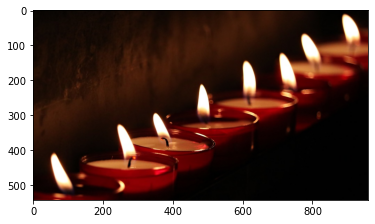

In [2]:
img = cv2.imread('candle.jpg')
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img);

In [3]:
# Specify offset factor
beta = 25

# Convert to YCrCb color space
ycbImage = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Convert to float32
ycbImage = np.float32(ycbImage)

# Split the channels
Ychannel, Cr, Cb = cv2.split(ycbImage)

In [4]:
# Add offset to the Ychannel 
Ychannel = np.clip(Ychannel + beta , 0, 255)

# Merge the channels and show the output
ycbImage = np.uint8( cv2.merge([Ychannel, Cr, Cb]) )

imbright = cv2.cvtColor(ycbImage, cv2.COLOR_YCrCb2RGB)

#combined = np.hstack([img, imbright])
# cv2.namedWindow("Original Image   --   Brightness Enhancement", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("Original Image   --   Brightness Enhancement", combined)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imwrite("results/bright.jpg",imbright)

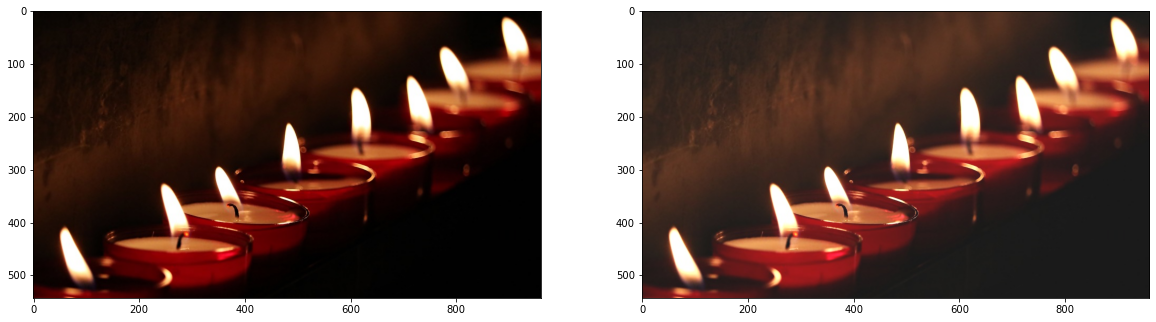

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.imshow(new_img)
ax2.imshow(imbright);

### Contrast enhancement

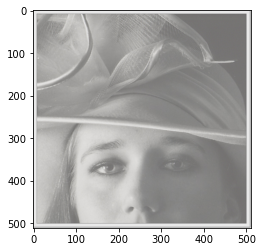

In [6]:
img = plt.imread('low_contrast_photograph.jpg')
plt.imshow(img);

In [7]:
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

<font color='red'>Why this image has low contrast?</font>

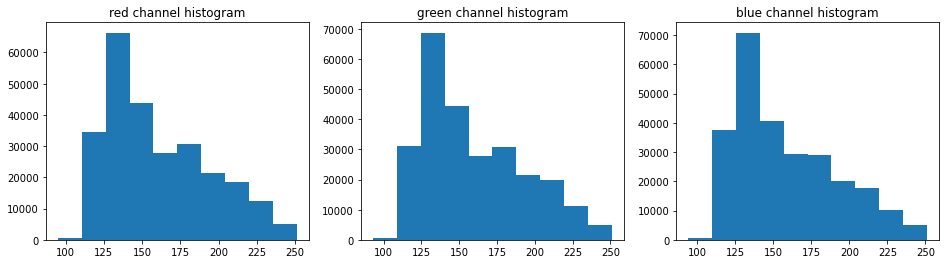

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

ax1.hist(red_channel.flatten());
ax1.set_title('red channel histogram')

ax2.hist(green_channel.flatten());
ax2.set_title('green channel histogram')

ax3.hist(blue_channel.flatten());
ax3.set_title('blue channel histogram');

### Linear correction for contrast enhancement

Linear correction is represented by the following equation -

$$I_{new} = \left(I_{old} - I_{min}\right) * \frac{255}{\left(I_{max} - I_{min}\right)}$$

In [9]:
new_img = img.copy()

new_img[:, :, 0] = (red_channel - red_channel.min()) * (255/(red_channel.max() - red_channel.min()))
new_img[:, :, 1] = (green_channel - green_channel.min()) * (255/(green_channel.max() - green_channel.min()))
new_img[:, :, 2] = (blue_channel - blue_channel.min()) * (255/(blue_channel.max() - blue_channel.min()))

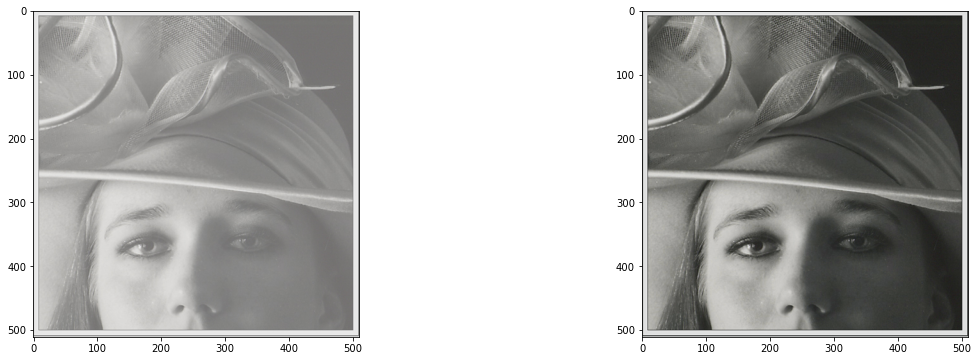

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.imshow(img)
ax2.imshow(new_img);

### Gamma correction for contrast enhancement

Gamma correction is represented by the following equation - 

$$ I_{0} = \left(\frac{I}{255}\right)^\frac{1}{γ} $$

In [11]:
def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

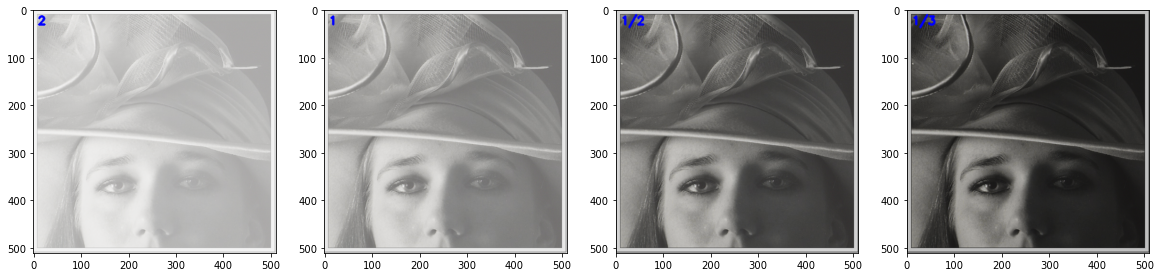

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 20))

adjusted = adjust_gamma(img, gamma=2)
cv2.putText(adjusted, "2", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
ax1.imshow(adjusted)

adjusted = adjust_gamma(img, gamma=1)
cv2.putText(adjusted, "1", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
ax2.imshow(adjusted);

adjusted = adjust_gamma(img, gamma=1/2)
cv2.putText(adjusted, "1/2", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
ax3.imshow(adjusted);

adjusted = adjust_gamma(img, gamma=1/3)
cv2.putText(adjusted, "1/3", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
ax4.imshow(adjusted);